# K-means Clustering

import libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

Read data from file

In [2]:
data=pd.read_csv(r'C:/Users/RUSHI/Desktop/sparks/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking for missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
data.drop(['Id'],axis=1,inplace=True)

In [8]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values  

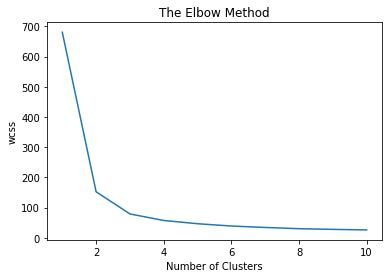

In [13]:
from sklearn.cluster import KMeans
arr=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit(x)
    arr.append(kmean.inertia_)
    
plt.plot(range(1,11),arr)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
    

Optimum solution occurs at clusters 3

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

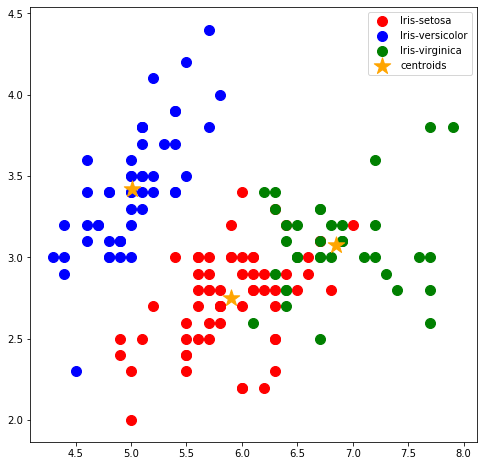

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa') 
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor') 
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica') 

#Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',s=300,c='orange',label='centroids') 
                                    
plt.legend()
plt.show()